In [8]:
# Import libraries

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Approach-1-Using classifier library.
##### Ref - google search, but throughly understood the internal working and perform customization

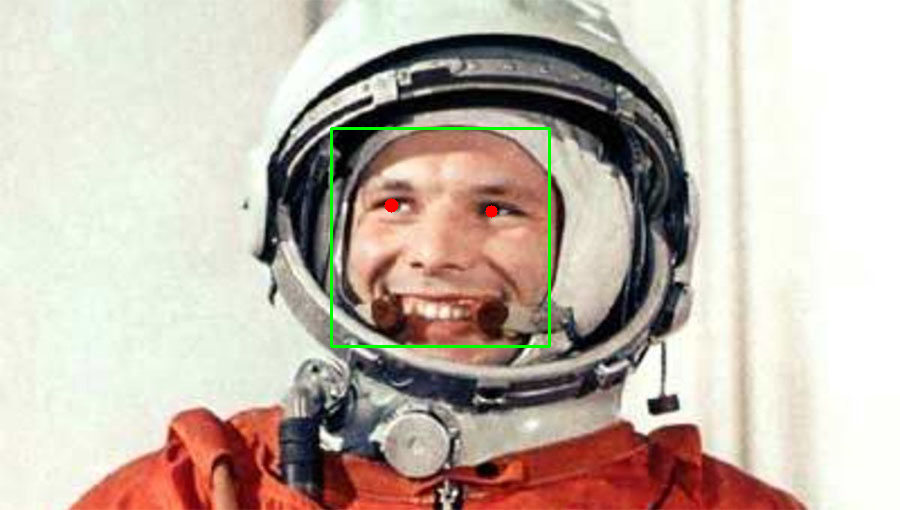

In [9]:
def highlight_red_eye(image):
    # Load the image
    img = cv2.imread(image)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect eyes in the image
    eyes = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml') # external fun library
    face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Detect faces in the image
    detected_face = face.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    detected_eyes = eyes.detectMultiScale(gray, 1.3, 5)

    # Loop over each detected eye
    for (x, y, w, h) in detected_eyes[:2]:
        # Calculate the center and radius of the circle
        center = (x + w//2, y + h//2)
        radius = max(w, h) // 8

        # Draw a filled red circle around the eye
        cv2.circle(img, center, radius, (0, 0, 255), -1)

    #  Draw a green bounding box around each face
    for (x, y, w, h) in detected_face:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img,detected_eyes,detected_face

# Example usage:
image = '/content/gagarin_2.jpg'
red_eye_image,detected_eyes,detected_face = highlight_red_eye(image)
cv2_imshow(red_eye_image)

# Approach-2-Using the eye/skin region matrix values from approach-1 and replacing these values with the red/bounding boxes value

In [10]:
detected_eyes

array([[363, 177,  57,  57],
       [465, 185,  53,  53],
       [582, 358,  50,  50]], dtype=int32)

In [11]:
detected_face

array([[331, 128, 218, 218]], dtype=int32)

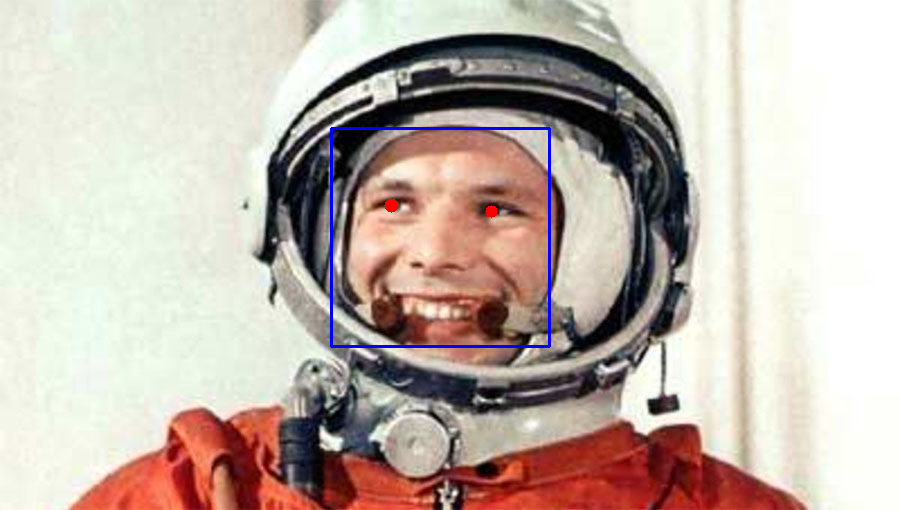

In [17]:
img = cv2.imread(image)
# Loop over each detected eye
for (x, y, w, h) in detected_eyes[:2]:
    # Calculate the center and radius of the circle
    center = (x + w//2, y + h//2)
    radius = max(w, h) // 8

    # Draw a filled red circle around the eye
    cv2.circle(img, center, radius, (0, 0, 255), -1)

# Define the bounding box color (BGR)
box_color = (255, 0, 0)

#  Draw a green bounding box around each face
for (x, y, w, h) in detected_face:
    cv2.rectangle(img, (x, y), (x+w, y+h), box_color, thickness=2)

# show the resulting image
cv2_imshow(img)